<a href="https://colab.research.google.com/github/JairTex/Atividade_Python/blob/main/Algoritmo_de_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estrutura de Dados II
####Docente: Jakelyne Silva
####Discentes: Antônio Alan Silva Lima, Breno do Carmo Sousa, Felipe Moreira Ferreira, Jair Soares Teixeira e Wallace Leonne Cardoso de Souza
##Algoritmo de Dijkstra (Algoritmo do Menor Caminho)
####Criado pelo matemático computacional holandês, Edsger Dijkstra (1930 — 2002). E trouxe uma solução para o problema do caminho mais curto num grafo dirigido. É muito útil para minimizar custos em várias áreas como por exemplo, na implementação de redes (por exemplos redes OSPF), ou no conhecido sistema GPS.
###Explicação:
####Dado um vértice (ou nó), em um determinado grafo, o algoritmo deve localizar o caminho com a menor custo, também chamdo de "Melhor Caminho", que é aquele mais curto, entre esse vértice e os outros vértices do grafo, a partir do peso ou custo da aresta. Este sistema, pode também ser usado para encontrar custos de caminhos mais curtos a partir de um único vértice para um vértice de destino parando o algoritmo uma vez que o caminho mais curto para o vértice destino tiver sido determinado.

In [ ]:
class HeapMin:
    '''
    Módulo que simula algumas operações de heapmin. Já que no Algoritmo de
    Dijkstra sempre buscamos a menor caminho, que podemos chamar de "melhor
    caminho", segundo o algoritmo.
    '''
    
    def __init__(self):
        '''
        Construtor do HeapMin.
        '''

        self.nos = 0 
        self.heap = []

    def adiciona_no(self, u, indice):
        '''
        Adiciona nó
        '''
        self.heap.append([u, indice]) 
        self.nos += 1
        f = self.nos
        while True:
            if f == 1:
                break
            p = f // 2 
            if self.heap[p-1][0] <= self.heap[f-1][0]: 
                break
            else:
                self.heap[p-1], self.heap[f-1] = self.heap[f-1], self.heap[p-1]
                f = p

    def mostra_heap(self):
        '''
        Mostra o Heap em formato de lista
        '''
        print(self.heap)

    def remove_no(self):
        '''
        Remove um nó do heap, mais especificamente, o primeiro nó
        posição[0]
        '''
        x = self.heap[0]
        self.heap[0] = self.heap[self.nos - 1]
        self.heap.pop()
        self.nos -= 1
        p = 1
        while True:
            f = 2 * p
            if f > self.nos:
                break
            if f + 1 <= self.nos:
                if self.heap[f][0] < self.heap[f-1][0]:
                    f += 1
            if self.heap[p-1][0] <= self.heap[f-1][0]:
                break
            else:
                self.heap[p-1], self.heap[f-1] = self.heap[f-1], self.heap[p-1]
                p = f
        return x

    def tamanho(self):
        '''
        Retorna o tamanho do Heap, ou seja, a sua quantidade de nós.
        '''
        return self.nos

In [ ]:
class Grafo:
    '''
    Módulo para a criação de grafos.
    '''
    
    def __init__(self, vertices):
        '''
        Construtor do Grafo
        '''
        self.vertices = vertices
        self.grafo = [[0] * self.vertices for i in range(self.vertices)]

    def adiciona_aresta(self, u, v, peso):
        '''
        Adiciona aresta levando em consideração que não é um grafo direcionado.
        Em outras palavras, a aresta tem um único valor, tanto de ida, quanto volta.
        '''
        self.grafo[u-1][v-1] = peso
        self.grafo[v-1][u-1] = peso

    def mostra_matriz(self):
        print('A matriz de adjacências é:')
        for i in range(self.vertices):
            print(self.grafo[i])

    def dijkstra(self, origem):
        '''
        Função que  automatiza a classificação do melhor caminho, ou caminho
        mais curto, segundo o ALgoritmo de Dijkstra.
        '''
        custo_vem = [[-1, 0] for i in range(self.vertices)]
        custo_vem[origem - 1] = [0, origem] #Nó de origem
        '''
        custo_vem = Indica o custo de se passar pelo vértice, quanto menor melhor,
        e ainda, de onde esse vértice está vindo.
        '''
        h = HeapMin()
        h.adiciona_no(0, origem) #Origem = 0
        
        while h.tamanho() > 0:
            dist, v = h.remove_no() #recebendo distancia e tamanho do vértice
            for i in range(self.vertices):
                if self.grafo[v-1][i] != 0:
                    if custo_vem[i][0] == -1 or custo_vem[i][0] > dist + self.grafo[v-1][i]:
                        custo_vem[i] = [dist + self.grafo[v-1][i], v]
                        h.adiciona_no(dist + self.grafo[v-1][i], i+1)
        return custo_vem

##Testes com o algoritmo
####Para os testes utilizaremos o seguinte grafo:


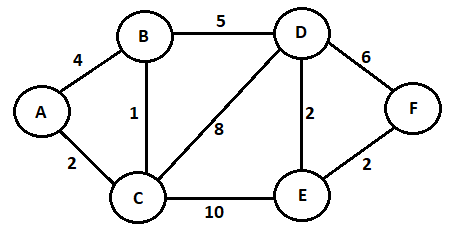

Onde A é representado no código pelo valor 1, B pelo valor 2, e assim sucessivamente, até o valor 6, que representa o F.
Declaramos um Grafo de 6 vértices, e declaramos as arestas de acordo com a figura acima:

In [41]:
g = Grafo(6) ##Grafo de tamanho 6

g.adiciona_aresta(1, 2, 4) ##Onde 1 é o vertice de origem, 2 é o vértice de destino e 4 o peso
g.adiciona_aresta(1, 3, 2)
g.adiciona_aresta(2, 3, 1)
g.adiciona_aresta(2, 4, 5)
g.adiciona_aresta(3, 4, 8)
g.adiciona_aresta(3, 5, 10)
g.adiciona_aresta(4, 5, 2)
g.adiciona_aresta(4, 6, 6)
g.adiciona_aresta(5, 6, 2)

print(f'Resultado do algoritmo: {g.dijkstra(1)}')

A matriz é: [[0, 1], [3, 3], [2, 1], [8, 2], [10, 4], [12, 5]]


O algoritmo de Dijkstra nos trás o menos caminho formado pelos menores sub-caminhos possíveis, de um vértice (origem), pra um vértice de destino dentro de um grafo.

O resultado esperado é: [[0, 1], [3, 3], [2, 1], [8, 2], [10, 4], [12, 5]]

Para traduzir em miúdos, temos o seguinte, o **destino** é a posição do valor na lista:

[0, 1] = Destino sendo A (1)

[3, 3] = Destino sendo B (2)

[2, 1] = Destino sendo C (3)

[8, 2] = Destino sendo D (4)

[10, 4] = Destino sendo E (5)

[12, 5] = Destino sendo F (6)

Então, temos o seguinte [custo, origem_prévia], onde o primeiro valor, o **custo** é igual à soma dos pesos, enquanto o segundo valor, **origem_previa** é igual ao último vértice antes do destino final.

 [[0, 1], [3, 3], [2, 1], [8, 2], [10, 4], [12, 5]]

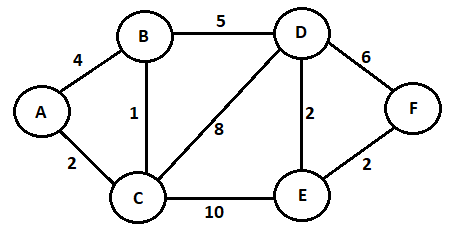

Por exemplo, na 5ª posição temos o [10,4], ou seja, temos um peso 10 (somatório dos pesos), para chegar no E (Representado por 5), apartir da origem (A, representado 1), e é precedido por D (Representado pelo 4).

Então, vamos para o próximo passo, para chegar no D (Representado por 4), temos [8,2], ou seja, 8 pesos e precedido pelo B (Representado pelo 2), E então vamos para o B, na 2ª posição, [3,3], peso somado 3, precedido por C [2,1], precedido por A, que era nossa origem.  